# The Look Ecommerce Analysis

The Look Ecommerce Analysis is a comprehensive data analysis project examining key business metrics and performance indicators from TheLook eCommerce platform using BigQuery public datasets. The project explores revenue trends, customer behavior, product performance, and sales growth patterns from 2019-2025, providing actionable insights through SQL queries and Python visualizations to understand business performance and identify growth opportunities.

**Monthly Revenue Trend Analysis (2019-2025)**

Time-series analysis of monthly revenue from 2019-2025, featuring trend visualization
and year-over-year comparisons. Reveals consistent revenue growth with accelerating
momentum, highlighting key growth periods and annual performance metrics.

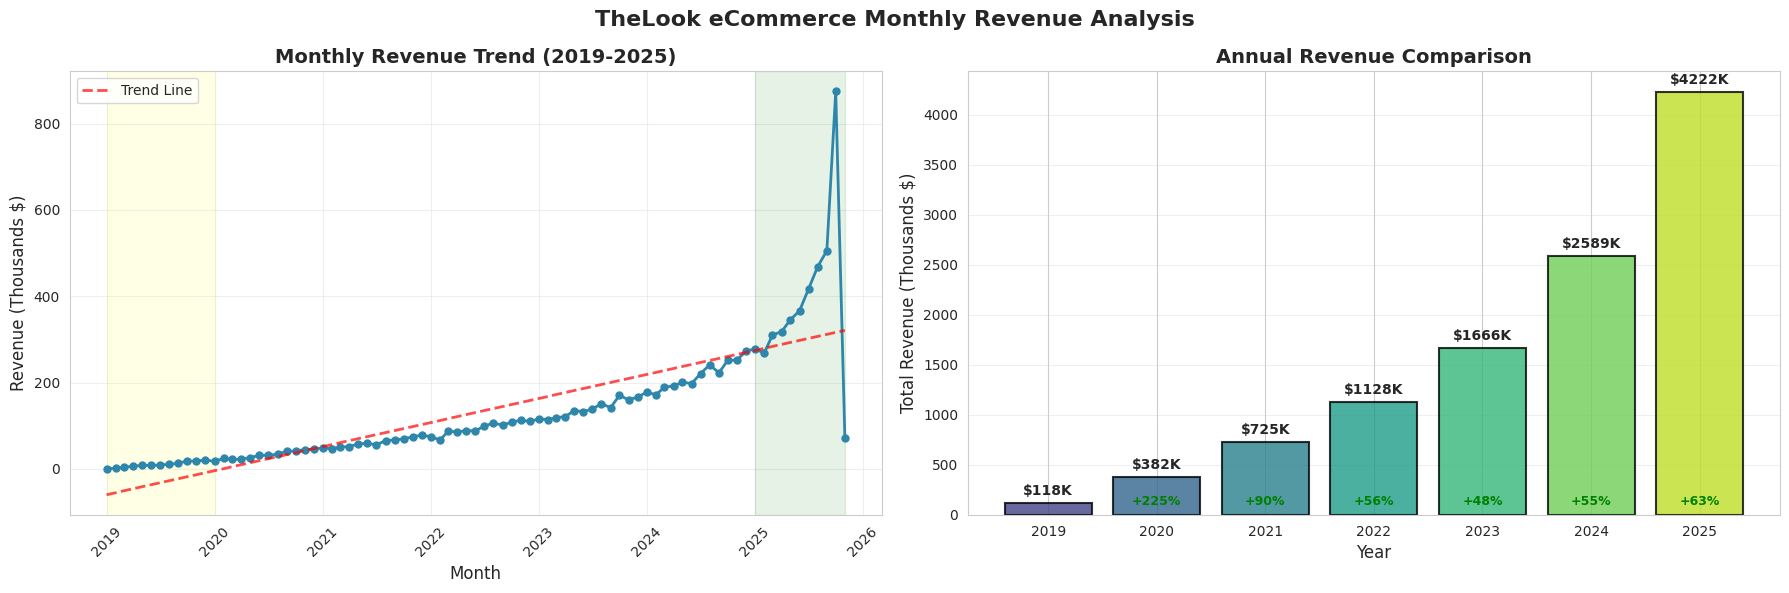


MONTHLY REVENUE SUMMARY STATISTICS
Analysis Period: 2019-01 to 2025-11
Total Months: 83

Overall Revenue:
  Total Revenue: $10,828,155.65
  Average Monthly: $130,459.71
  Median Monthly: $88,196.92

Highest Revenue Month:
  Month: 2025-10
  Revenue: $874,296.13

Lowest Revenue Month:
  Month: 2019-01
  Revenue: $834.71

Revenue Growth:
  First Month (2019-01): $834.71
  Last Month (2025-11): $70,507.89
  Total Growth: 8,347.0%

YEAR-OVER-YEAR COMPARISON
2019: $  117,556.35
2020: $  381,597.15 (+224.6% YoY)
2021: $  724,752.49 ( +89.9% YoY)
2022: $1,127,910.47 ( +55.6% YoY)
2023: $1,665,713.57 ( +47.7% YoY)
2024: $2,589,102.87 ( +55.4% YoY)
2025: $4,221,522.75 ( +63.0% YoY)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('00_monthly_revenue_trend.csv')

# Convert month to datetime for better plotting
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('TheLook eCommerce Monthly Revenue Analysis', fontsize=16, fontweight='bold')

# Plot 1: Time Series Line Chart
ax1 = axes[0]
ax1.plot(df['month'], df['total_revenue'] / 1000,
         marker='o', linewidth=2, markersize=5, color='#2E86AB')
ax1.set_title('Monthly Revenue Trend (2019-2025)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue (Thousands $)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(df)), df['total_revenue'], 1)
p = np.poly1d(z)
ax1.plot(df['month'], p(range(len(df))) / 1000,
         "r--", linewidth=2, alpha=0.7, label='Trend Line')
ax1.legend(loc='upper left', fontsize=10)

# Highlight significant growth periods
ax1.axvspan(df['month'].iloc[0], pd.Timestamp('2020-01-01'), alpha=0.1, color='yellow', label='Early Growth')
ax1.axvspan(pd.Timestamp('2025-01-01'), df['month'].iloc[-1], alpha=0.1, color='green', label='Peak Period')

# Plot 2: Year-over-Year Comparison (Bar Chart)
ax2 = axes[1]
yearly_revenue = df.groupby('year')['total_revenue'].sum().reset_index()
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(yearly_revenue)))
bars = ax2.bar(yearly_revenue['year'], yearly_revenue['total_revenue'] / 1000,
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_title('Annual Revenue Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Total Revenue (Thousands $)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (year, revenue) in enumerate(zip(yearly_revenue['year'], yearly_revenue['total_revenue'])):
    ax2.text(year, revenue / 1000 + 50, f'${revenue/1000:.0f}K',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add growth rate annotations
for i in range(1, len(yearly_revenue)):
    prev_revenue = yearly_revenue.iloc[i-1]['total_revenue']
    curr_revenue = yearly_revenue.iloc[i]['total_revenue']
    growth = ((curr_revenue - prev_revenue) / prev_revenue) * 100
    year = yearly_revenue.iloc[i]['year']

    color = 'green' if growth > 0 else 'red'
    ax2.text(year, 100, f'+{growth:.0f}%' if growth > 0 else f'{growth:.0f}%',
             ha='center', fontsize=9, color=color, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("MONTHLY REVENUE SUMMARY STATISTICS")
print("="*70)
print(f"Analysis Period: {df['month'].min().strftime('%Y-%m')} to {df['month'].max().strftime('%Y-%m')}")
print(f"Total Months: {len(df)}")
print(f"\nOverall Revenue:")
print(f"  Total Revenue: ${df['total_revenue'].sum():,.2f}")
print(f"  Average Monthly: ${df['total_revenue'].mean():,.2f}")
print(f"  Median Monthly: ${df['total_revenue'].median():,.2f}")

print(f"\nHighest Revenue Month:")
max_idx = df['total_revenue'].idxmax()
print(f"  Month: {df.loc[max_idx, 'month'].strftime('%Y-%m')}")
print(f"  Revenue: ${df.loc[max_idx, 'total_revenue']:,.2f}")

print(f"\nLowest Revenue Month:")
min_idx = df['total_revenue'].idxmin()
print(f"  Month: {df.loc[min_idx, 'month'].strftime('%Y-%m')}")
print(f"  Revenue: ${df.loc[min_idx, 'total_revenue']:,.2f}")

print(f"\nRevenue Growth:")
first_month = df.iloc[0]['total_revenue']
last_month = df.iloc[-1]['total_revenue']
total_growth = ((last_month - first_month) / first_month) * 100
print(f"  First Month ({df.iloc[0]['month'].strftime('%Y-%m')}): ${first_month:,.2f}")
print(f"  Last Month ({df.iloc[-1]['month'].strftime('%Y-%m')}): ${last_month:,.2f}")
print(f"  Total Growth: {total_growth:,.1f}%")

print("\n" + "="*70)
print("YEAR-OVER-YEAR COMPARISON")
print("="*70)
for i, row in yearly_revenue.iterrows():
    year = int(row['year'])
    revenue = row['total_revenue']
    if i > 0:
        prev_revenue = yearly_revenue.iloc[i-1]['total_revenue']
        growth = ((revenue - prev_revenue) / prev_revenue) * 100
        print(f"{year}: ${revenue:>12,.2f} ({growth:>+6.1f}% YoY)")
    else:
        print(f"{year}: ${revenue:>12,.2f}")

print("="*70)

**Top 15 Best-Selling Products Analysis**

Analysis of the highest-revenue products in TheLook eCommerce catalog, featuring sales
rankings and market share distribution. Dominated by outerwear brands (The North Face,
Canada Goose, Diesel), with The North Face Denali Down Womens Jacket leading at $15.4K.
Includes brand performance breakdown and concentration metrics showing top 5 products
account for majority of sales among the top 15.

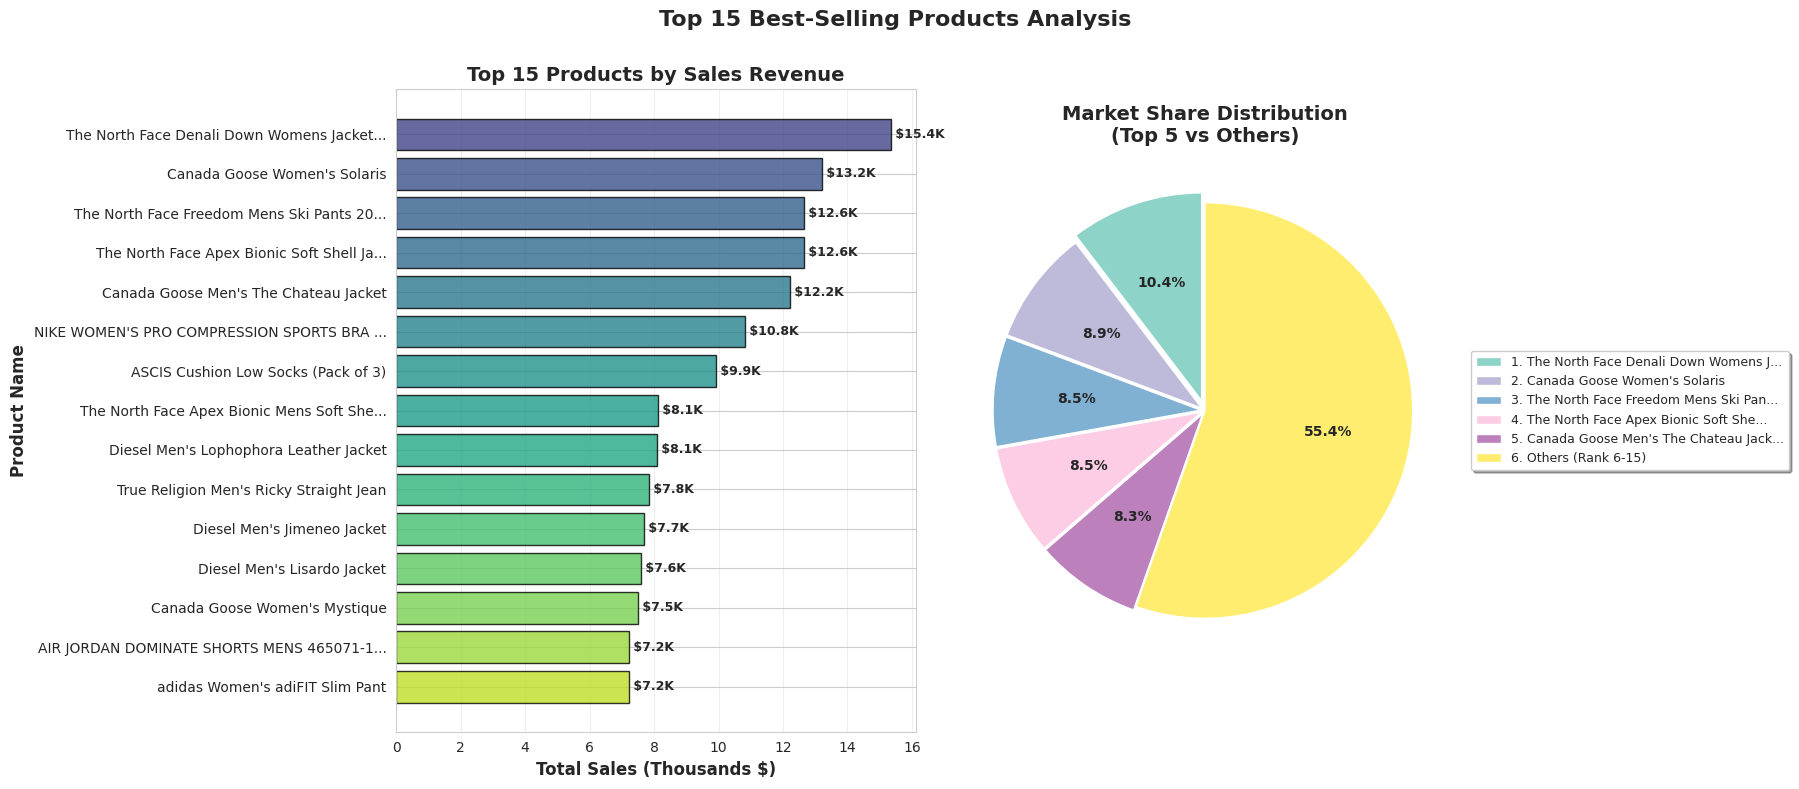


TOP 15 SELLING PRODUCTS SUMMARY
Total Sales (Top 15): $148,096.65
Average Sales per Product: $9,873.11
Median Sales: $8,127.00

#1 Best-Selling Product:
  Product: The North Face Denali Down Womens Jacket 2013
  Sales: $15,351.00
  Market Share: 10.4%

#15 Product:
  Product: adidas Women's adiFIT Slim Pant
  Sales: $7,224.00
  Market Share: 4.9%

Sales Gap (1st vs 15th): $8,127.00
Sales Ratio (1st / 15th): 2.12x

BRAND ANALYSIS
The North Face      : $ 48,762.00 (4 products) -  32.9%
Canada Goose        : $ 32,930.00 (3 products) -  22.2%
Nike/Adidas         : $ 35,217.00 (4 products) -  23.8%
Diesel              : $ 23,340.00 (3 products) -  15.8%
Other               : $  7,847.65 (1 products) -   5.3%

TOP 5 PRODUCTS CONCENTRATION
Top 5 Products: $66,065.00 (44.6% of top 15)
Remaining 10 Products: $82,031.65 (55.4% of top 15)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('01_top_15_selling_product.csv')

# Shorten product names for better display
df['short_name'] = df['product_name'].apply(lambda x: x[:40] + '...' if len(x) > 40 else x)

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 15 Best-Selling Products Analysis', fontsize=16, fontweight='bold')

# Plot 1: Horizontal Bar Chart
ax1 = axes[0]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(df)))
bars = ax1.barh(df['short_name'], df['total_sales'] / 1000,
                color=colors, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Total Sales (Thousands $)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Product Name', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Products by Sales Revenue', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (name, sales) in enumerate(zip(df['short_name'], df['total_sales'])):
    ax1.text(sales / 1000, i, f' ${sales/1000:.1f}K',
             va='center', fontsize=9, fontweight='bold')

# Plot 2: Pie Chart with Market Share
ax2 = axes[1]
# Top 5 individual + "Others"
top_5 = df.head(5).copy()
others_sales = df.tail(10)['total_sales'].sum()
top_5_with_others = pd.concat([
    top_5[['product_name', 'total_sales']],
    pd.DataFrame({'product_name': ['Others (Rank 6-15)'], 'total_sales': [others_sales]})
])

# Create pie chart
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(top_5_with_others)))
explode = [0.05, 0.02, 0.02, 0.02, 0.02, 0]
wedges, texts, autotexts = ax2.pie(
    top_5_with_others['total_sales'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    explode=explode,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

ax2.set_title('Market Share Distribution\n(Top 5 vs Others)', fontsize=14, fontweight='bold')

# Create legend with shortened names
legend_labels = []
for i, name in enumerate(top_5_with_others['product_name']):
    if name == 'Others (Rank 6-15)':
        legend_labels.append(f"{i+1}. {name}")
    else:
        short = name[:35] + '...' if len(name) > 35 else name
        legend_labels.append(f"{i+1}. {short}")

ax2.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=9, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("TOP 15 SELLING PRODUCTS SUMMARY")
print("="*80)
print(f"Total Sales (Top 15): ${df['total_sales'].sum():,.2f}")
print(f"Average Sales per Product: ${df['total_sales'].mean():,.2f}")
print(f"Median Sales: ${df['total_sales'].median():,.2f}")

print(f"\n#1 Best-Selling Product:")
print(f"  Product: {df.iloc[0]['product_name']}")
print(f"  Sales: ${df.iloc[0]['total_sales']:,.2f}")
print(f"  Market Share: {(df.iloc[0]['total_sales']/df['total_sales'].sum())*100:.1f}%")

print(f"\n#15 Product:")
print(f"  Product: {df.iloc[-1]['product_name']}")
print(f"  Sales: ${df.iloc[-1]['total_sales']:,.2f}")
print(f"  Market Share: {(df.iloc[-1]['total_sales']/df['total_sales'].sum())*100:.1f}%")

print(f"\nSales Gap (1st vs 15th): ${(df.iloc[0]['total_sales'] - df.iloc[-1]['total_sales']):,.2f}")
print(f"Sales Ratio (1st / 15th): {df.iloc[0]['total_sales'] / df.iloc[-1]['total_sales']:.2f}x")

# Categorize by brand
print("\n" + "="*80)
print("BRAND ANALYSIS")
print("="*80)

brands = {
    'The North Face': [],
    'Canada Goose': [],
    'Nike/Adidas': [],
    'Diesel': [],
    'Other': []
}

for _, row in df.iterrows():
    name = row['product_name']
    sales = row['total_sales']
    if 'North Face' in name:
        brands['The North Face'].append(sales)
    elif 'Canada Goose' in name:
        brands['Canada Goose'].append(sales)
    elif 'NIKE' in name or 'adidas' in name or 'JORDAN' in name or 'ASCIS' in name:
        brands['Nike/Adidas'].append(sales)
    elif 'Diesel' in name:
        brands['Diesel'].append(sales)
    else:
        brands['Other'].append(sales)

for brand, sales_list in brands.items():
    if sales_list:
        total = sum(sales_list)
        count = len(sales_list)
        pct = (total / df['total_sales'].sum()) * 100
        print(f"{brand:20s}: ${total:>10,.2f} ({count} products) - {pct:>5.1f}%")

print("\n" + "="*80)
print("TOP 5 PRODUCTS CONCENTRATION")
print("="*80)
top_5_sales = df.head(5)['total_sales'].sum()
top_5_pct = (top_5_sales / df['total_sales'].sum()) * 100
print(f"Top 5 Products: ${top_5_sales:,.2f} ({top_5_pct:.1f}% of top 15)")
print(f"Remaining 10 Products: ${df.tail(10)['total_sales'].sum():,.2f} ({100-top_5_pct:.1f}% of top 15)")
print("="*80)

**Top 10 Customers by Lifetime Value**

Analysis of the highest-value customers ranked by lifetime spending. Shane Anthony leads with \$2,385 in lifetime value, followed by Jessica Figueroa at $1,807.21. Features customer ranking visualization, lifetime value distribution, and tier segmentation (Elite, Premium, Standard). Includes gap analysis showing the value difference between top and bottom performers within the top 10, with average lifetime value comparisons.

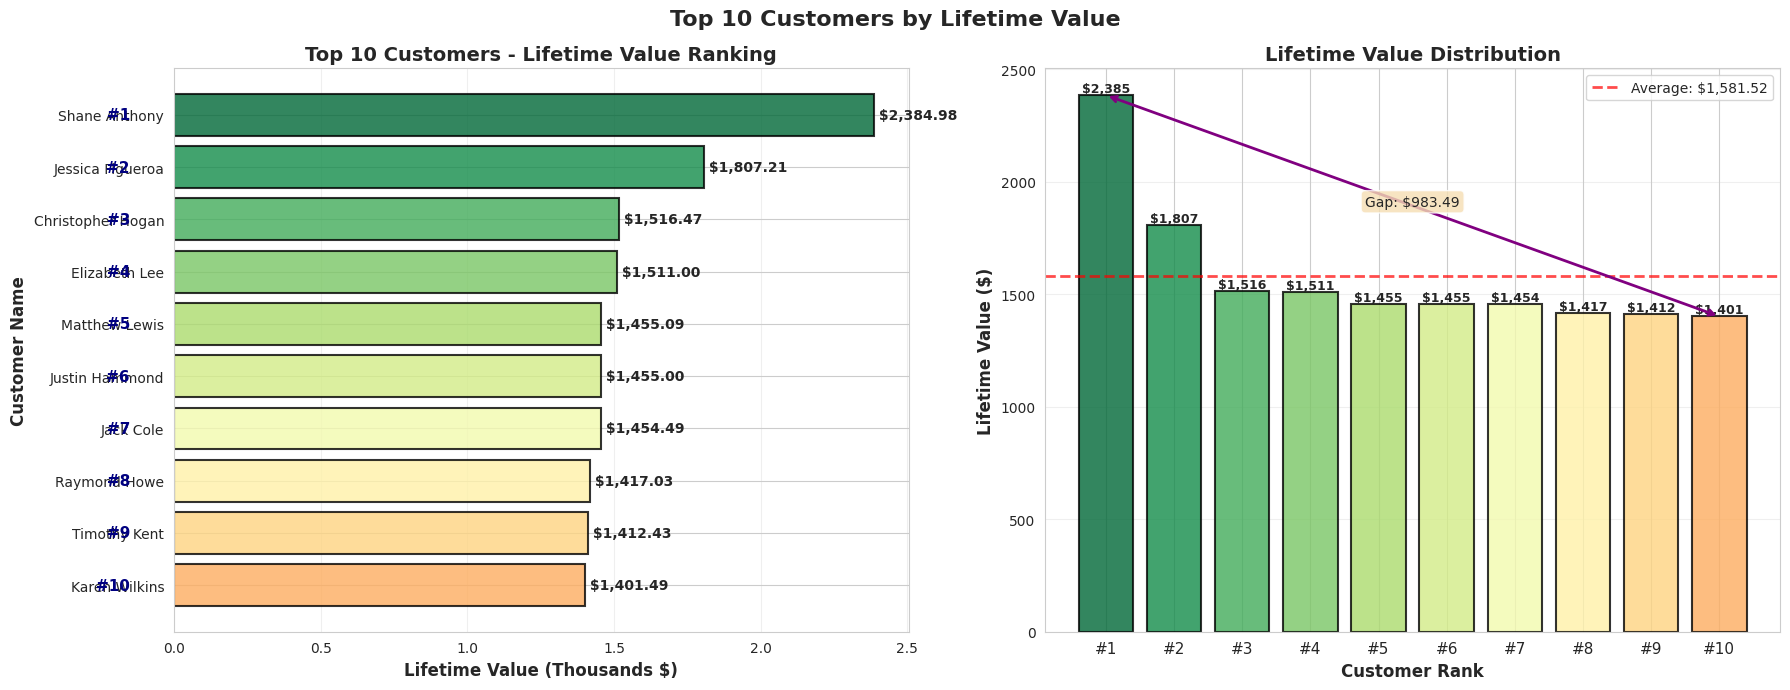


TOP 10 CUSTOMERS SUMMARY STATISTICS
Total Lifetime Value (Top 10): $15,815.19
Average Lifetime Value: $1,581.52
Median Lifetime Value: $1,455.05
Standard Deviation: $305.85

#1 Top Customer:
  Name: Shane Anthony
  User ID: 90582
  Lifetime Value: $2,384.98
  Share of Top 10: 15.1%

#10 Customer:
  Name: Karen Wilkins
  User ID: 96053
  Lifetime Value: $1,401.49
  Share of Top 10: 8.9%

Value Gap Analysis:
  1st vs 10th: $983.49
  Ratio (1st / 10th): 1.70x
  1st vs Average: $803.46

DETAILED CUSTOMER BREAKDOWN
Rank   Customer Name                  User ID    LTV          % of Total
--------------------------------------------------------------------------------
#1     Shane Anthony                  90582      $  2,384.98     15.1%
#2     Jessica Figueroa               89139      $  1,807.21     11.4%
#3     Christopher Hogan              15751      $  1,516.47      9.6%
#4     Elizabeth Lee                  20854      $  1,511.00      9.6%
#5     Matthew Lewis                  18419  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('02_top_10_customers.csv')

# Create full name for display
df['full_name'] = df['first_name'] + ' ' + df['last_name']

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Top 10 Customers by Lifetime Value', fontsize=16, fontweight='bold')

# Plot 1: Horizontal Bar Chart
ax1 = axes[0]
colors = plt.cm.RdYlGn(np.linspace(0.3, 1, len(df)))[::-1]
bars = ax1.barh(df['full_name'], df['lifetime_value'] / 1000,
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Lifetime Value (Thousands $)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Customer Name', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Customers - Lifetime Value Ranking', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels and rank
for i, (name, ltv) in enumerate(zip(df['full_name'], df['lifetime_value'])):
    ax1.text(ltv / 1000, i, f' ${ltv:,.2f}',
             va='center', fontsize=10, fontweight='bold')
    # Add rank number on the left
    ax1.text(-0.15, i, f'#{i+1}',
             va='center', ha='right', fontsize=11, fontweight='bold', color='navy')

# Plot 2: Comparison Chart with Metrics
ax2 = axes[1]

# Vertical bar chart
x_pos = np.arange(len(df))
bars = ax2.bar(x_pos, df['lifetime_value'],
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Customer Rank', fontsize=12, fontweight='bold')
ax2.set_ylabel('Lifetime Value ($)', fontsize=12, fontweight='bold')
ax2.set_title('Lifetime Value Distribution', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'#{i+1}' for i in range(len(df))], fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (ltv, bar) in enumerate(zip(df['lifetime_value'], bars)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${ltv:,.0f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add average line
avg_ltv = df['lifetime_value'].mean()
ax2.axhline(y=avg_ltv, color='red', linestyle='--', linewidth=2,
            alpha=0.7, label=f'Average: ${avg_ltv:,.2f}')
ax2.legend(loc='upper right', fontsize=10)

# Add gap indicator
gap = df.iloc[0]['lifetime_value'] - df.iloc[-1]['lifetime_value']
ax2.annotate('', xy=(0, df.iloc[0]['lifetime_value']),
             xytext=(9, df.iloc[-1]['lifetime_value']),
             arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax2.text(4.5, (df.iloc[0]['lifetime_value'] + df.iloc[-1]['lifetime_value'])/2,
         f'Gap: ${gap:,.2f}', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("TOP 10 CUSTOMERS SUMMARY STATISTICS")
print("="*80)
print(f"Total Lifetime Value (Top 10): ${df['lifetime_value'].sum():,.2f}")
print(f"Average Lifetime Value: ${df['lifetime_value'].mean():,.2f}")
print(f"Median Lifetime Value: ${df['lifetime_value'].median():,.2f}")
print(f"Standard Deviation: ${df['lifetime_value'].std():,.2f}")

print(f"\n#1 Top Customer:")
print(f"  Name: {df.iloc[0]['full_name']}")
print(f"  User ID: {df.iloc[0]['user_id']}")
print(f"  Lifetime Value: ${df.iloc[0]['lifetime_value']:,.2f}")
print(f"  Share of Top 10: {(df.iloc[0]['lifetime_value']/df['lifetime_value'].sum())*100:.1f}%")

print(f"\n#10 Customer:")
print(f"  Name: {df.iloc[-1]['full_name']}")
print(f"  User ID: {df.iloc[-1]['user_id']}")
print(f"  Lifetime Value: ${df.iloc[-1]['lifetime_value']:,.2f}")
print(f"  Share of Top 10: {(df.iloc[-1]['lifetime_value']/df['lifetime_value'].sum())*100:.1f}%")

print(f"\nValue Gap Analysis:")
print(f"  1st vs 10th: ${df.iloc[0]['lifetime_value'] - df.iloc[-1]['lifetime_value']:,.2f}")
print(f"  Ratio (1st / 10th): {df.iloc[0]['lifetime_value'] / df.iloc[-1]['lifetime_value']:.2f}x")
print(f"  1st vs Average: ${df.iloc[0]['lifetime_value'] - df['lifetime_value'].mean():,.2f}")

print("\n" + "="*80)
print("DETAILED CUSTOMER BREAKDOWN")
print("="*80)
print(f"{'Rank':<6} {'Customer Name':<30} {'User ID':<10} {'LTV':<12} {'% of Total':<10}")
print("-"*80)
for i, row in df.iterrows():
    rank = i + 1
    name = row['full_name']
    user_id = row['user_id']
    ltv = row['lifetime_value']
    pct = (ltv / df['lifetime_value'].sum()) * 100
    print(f"#{rank:<5} {name:<30} {user_id:<10} ${ltv:>10,.2f} {pct:>8.1f}%")

print("="*80)

# Customer tier analysis
print("\n" + "="*80)
print("CUSTOMER TIER ANALYSIS")
print("="*80)
tiers = [
    ("Elite (Top 3)", df.head(3)['lifetime_value'].sum()),
    ("Premium (4-6)", df.iloc[3:6]['lifetime_value'].sum()),
    ("Standard (7-10)", df.tail(4)['lifetime_value'].sum())
]

for tier_name, tier_value in tiers:
    tier_pct = (tier_value / df['lifetime_value'].sum()) * 100
    print(f"{tier_name:20s}: ${tier_value:>10,.2f} ({tier_pct:>5.1f}% of total)")
print("="*80)

**Average Order Value (AOV) Trend Analysis**

Time-series analysis of average order value from 2019-2025, featuring monthly trends with 12-month moving average and yearly distribution box plots. AOV remains relatively stable around \$86-87 with peak at \$101.05 (Feb 2020) and lowest at $53.95 (Feb 2019). Includes year-over-year comparisons, volatility analysis, and stability ratings showing consistent customer spending patterns across the period.

/tmp/ipython-input-3862031819.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(yearly_data, labels=df['year'].unique(), patch_artist=True,


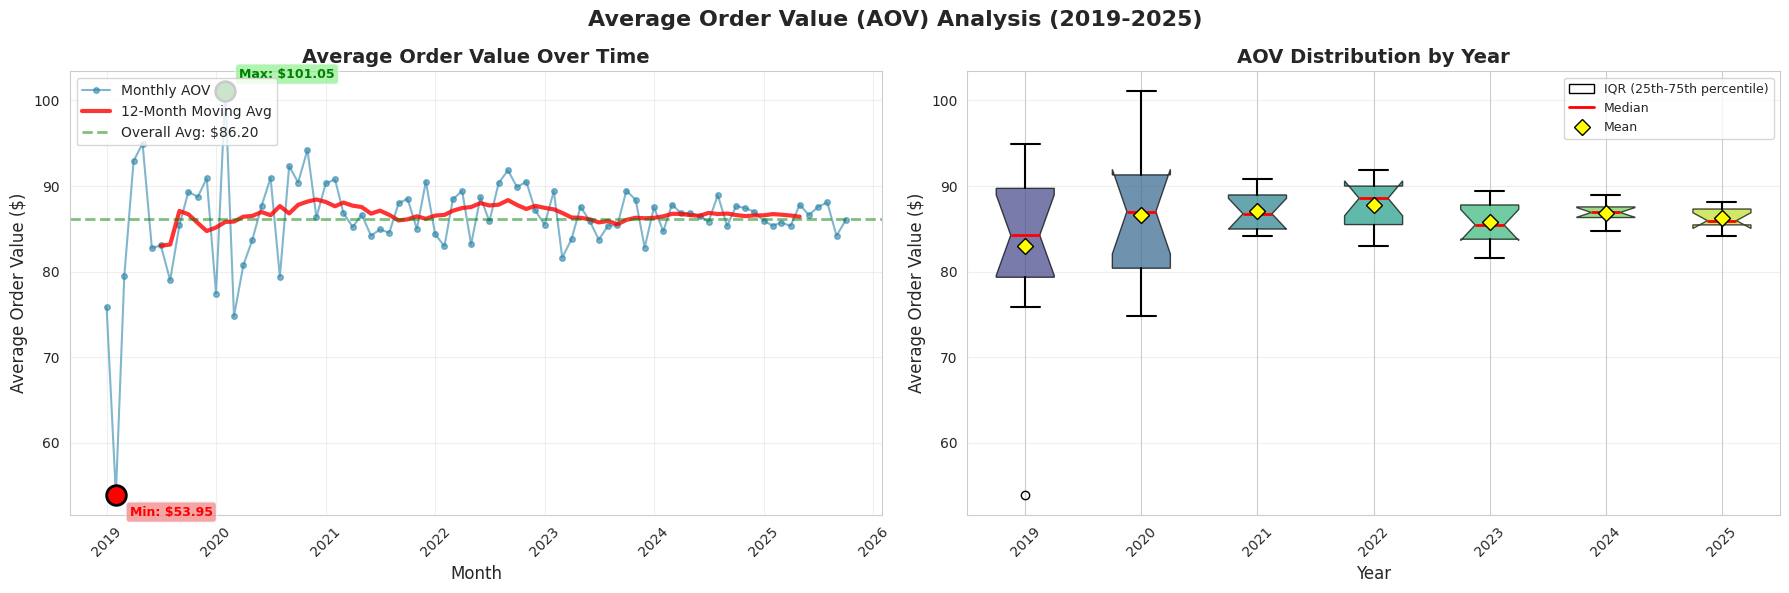


AVERAGE ORDER VALUE (AOV) SUMMARY STATISTICS
Analysis Period: 2019-01 to 2025-10
Total Months: 82

Overall AOV Statistics:
  Mean AOV: $86.20
  Median AOV: $86.64
  Std Deviation: $5.43
  Min AOV: $53.95
  Max AOV: $101.05
  Range: $47.10

Highest AOV Month:
  Month: 2020-02
  AOV: $101.05

Lowest AOV Month:
  Month: 2019-02
  AOV: $53.95

YEARLY AOV COMPARISON
Year   Mean       Median     Std Dev    Min        Max       
----------------------------------------------------------------------
2019   $   83.04 $   84.26 $   10.90 $   53.95 $   94.97
2020   $   86.60 $   87.02 $    7.70 $   74.79 $  101.05
2021   $   87.13 $   86.77 $    2.45 $   84.21 $   90.78
2022   $   87.73 $   88.57 $    3.00 $   82.98 $   91.85
2023   $   85.76 $   85.46 $    2.55 $   81.64 $   89.48
2024   $   86.87 $   86.92 $    1.16 $   84.71 $   88.94
2025   $   86.27 $   85.97 $    1.25 $   84.20 $   88.10

YEAR-OVER-YEAR CHANGES
2019 → 2020: $83.04 → $86.60 (+3.56, +4.3%)
2020 → 2021: $86.60 → $87.13 (+0.54

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('03_average_order_value.csv')

# Convert month to datetime
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Average Order Value (AOV) Analysis (2019-2025)', fontsize=16, fontweight='bold')

# Plot 1: Time Series Line Chart with Moving Average
ax1 = axes[0]
ax1.plot(df['month'], df['avg_order_value'],
         marker='o', linewidth=1.5, markersize=4, color='#2E86AB', alpha=0.6, label='Monthly AOV')

# Add 12-month moving average
df['moving_avg'] = df['avg_order_value'].rolling(window=12, center=True).mean()
ax1.plot(df['month'], df['moving_avg'],
         linewidth=3, color='red', alpha=0.8, label='12-Month Moving Avg')

ax1.set_title('Average Order Value Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Order Value ($)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left', fontsize=10)

# Add overall average line
overall_avg = df['avg_order_value'].mean()
ax1.axhline(y=overall_avg, color='green', linestyle='--', linewidth=2,
            alpha=0.5, label=f'Overall Avg: ${overall_avg:.2f}')
ax1.legend(loc='upper left', fontsize=10)

# Highlight min and max
max_idx = df['avg_order_value'].idxmax()
min_idx = df['avg_order_value'].idxmin()
ax1.scatter(df.loc[max_idx, 'month'], df.loc[max_idx, 'avg_order_value'],
           color='green', s=200, zorder=5, edgecolor='black', linewidth=2)
ax1.scatter(df.loc[min_idx, 'month'], df.loc[min_idx, 'avg_order_value'],
           color='red', s=200, zorder=5, edgecolor='black', linewidth=2)

ax1.annotate(f"Max: ${df.loc[max_idx, 'avg_order_value']:.2f}",
            xy=(df.loc[max_idx, 'month'], df.loc[max_idx, 'avg_order_value']),
            xytext=(10, 10), textcoords='offset points',
            fontsize=9, fontweight='bold', color='green',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax1.annotate(f"Min: ${df.loc[min_idx, 'avg_order_value']:.2f}",
            xy=(df.loc[min_idx, 'month'], df.loc[min_idx, 'avg_order_value']),
            xytext=(10, -15), textcoords='offset points',
            fontsize=9, fontweight='bold', color='red',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Plot 2: Box Plot by Year
ax2 = axes[1]
yearly_data = [df[df['year'] == year]['avg_order_value'].values for year in df['year'].unique()]
bp = ax2.boxplot(yearly_data, labels=df['year'].unique(), patch_artist=True,
                 notch=True, showmeans=True)

# Color the boxes
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(bp['boxes'])))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize box plot elements
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5)
for cap in bp['caps']:
    cap.set(linewidth=1.5)
for median in bp['medians']:
    median.set(color='red', linewidth=2)
for mean in bp['means']:
    mean.set(marker='D', markerfacecolor='yellow', markeredgecolor='black', markersize=8)

ax2.set_title('AOV Distribution by Year', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average Order Value ($)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

# Add legend for box plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='white', edgecolor='black', label='IQR (25th-75th percentile)'),
    plt.Line2D([0], [0], color='red', linewidth=2, label='Median'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='yellow',
               markeredgecolor='black', markersize=8, label='Mean')
]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("AVERAGE ORDER VALUE (AOV) SUMMARY STATISTICS")
print("="*70)
print(f"Analysis Period: {df['month'].min().strftime('%Y-%m')} to {df['month'].max().strftime('%Y-%m')}")
print(f"Total Months: {len(df)}")

print(f"\nOverall AOV Statistics:")
print(f"  Mean AOV: ${df['avg_order_value'].mean():.2f}")
print(f"  Median AOV: ${df['avg_order_value'].median():.2f}")
print(f"  Std Deviation: ${df['avg_order_value'].std():.2f}")
print(f"  Min AOV: ${df['avg_order_value'].min():.2f}")
print(f"  Max AOV: ${df['avg_order_value'].max():.2f}")
print(f"  Range: ${df['avg_order_value'].max() - df['avg_order_value'].min():.2f}")

print(f"\nHighest AOV Month:")
print(f"  Month: {df.loc[max_idx, 'month'].strftime('%Y-%m')}")
print(f"  AOV: ${df.loc[max_idx, 'avg_order_value']:.2f}")

print(f"\nLowest AOV Month:")
print(f"  Month: {df.loc[min_idx, 'month'].strftime('%Y-%m')}")
print(f"  AOV: ${df.loc[min_idx, 'avg_order_value']:.2f}")

print("\n" + "="*70)
print("YEARLY AOV COMPARISON")
print("="*70)
yearly_stats = df.groupby('year')['avg_order_value'].agg(['mean', 'median', 'std', 'min', 'max'])
print(f"{'Year':<6} {'Mean':<10} {'Median':<10} {'Std Dev':<10} {'Min':<10} {'Max':<10}")
print("-"*70)
for year, row in yearly_stats.iterrows():
    print(f"{int(year):<6} ${row['mean']:>8.2f} ${row['median']:>8.2f} "
          f"${row['std']:>8.2f} ${row['min']:>8.2f} ${row['max']:>8.2f}")

print("\n" + "="*70)
print("YEAR-OVER-YEAR CHANGES")
print("="*70)
yearly_avg = df.groupby('year')['avg_order_value'].mean()
for i in range(1, len(yearly_avg)):
    prev_year = yearly_avg.index[i-1]
    curr_year = yearly_avg.index[i]
    prev_aov = yearly_avg.iloc[i-1]
    curr_aov = yearly_avg.iloc[i]
    change = curr_aov - prev_aov
    change_pct = (change / prev_aov) * 100

    print(f"{int(prev_year)} → {int(curr_year)}: ${prev_aov:.2f} → ${curr_aov:.2f} "
          f"({change:+.2f}, {change_pct:+.1f}%)")

print("\n" + "="*70)
print("AOV STABILITY ANALYSIS")
print("="*70)
volatility = (df['avg_order_value'].std() / df['avg_order_value'].mean()) * 100
print(f"Coefficient of Variation: {volatility:.2f}%")
if volatility < 10:
    stability = "Very Stable"
elif volatility < 15:
    stability = "Stable"
elif volatility < 20:
    stability = "Moderate"
else:
    stability = "Volatile"
print(f"AOV Stability Rating: {stability}")
print("="*70)

**Product Category Performance Analysis**

Comprehensive analysis of top 10 product categories by revenue and order volume. Outerwear
& Coats leads with \$1.32M revenue (8,926 orders), followed by Jeans at $1.24M (12,154
orders). Features dual-axis visualization comparing revenue vs order volume, and scatter
plot analysis showing the relationship between orders, revenue, and average order value.
Includes efficiency metrics identifying high-AOV categories like Suits & Sport Coats
(\$130.75/order) versus high-volume categories like Fashion Hoodies & Sweatshirts.

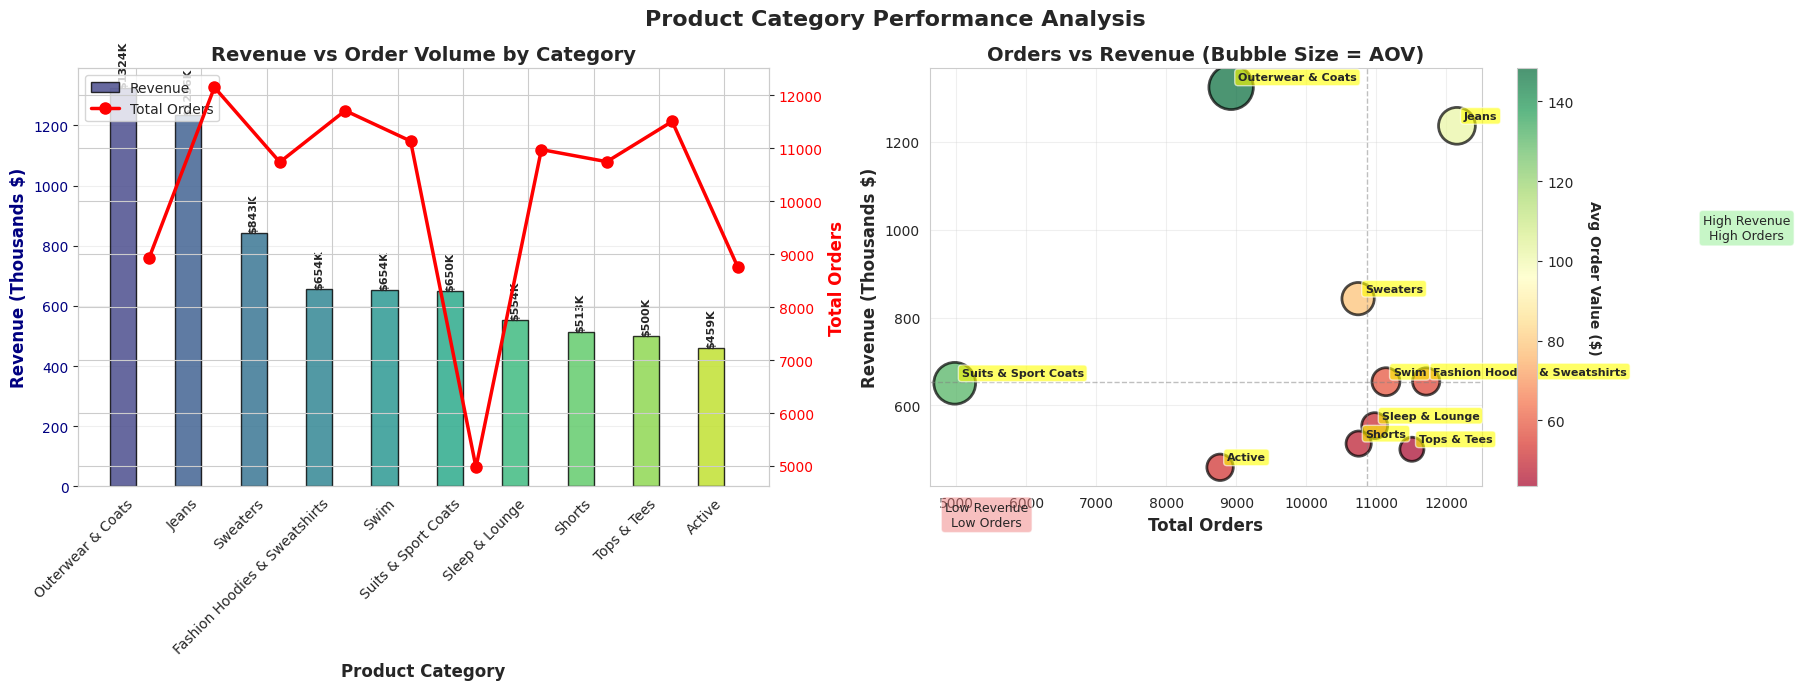


PRODUCT CATEGORY PERFORMANCE SUMMARY
Total Revenue (All Categories): $7,388,130.03
Total Orders (All Categories): 101,654
Overall Average Order Value: $72.68

DETAILED CATEGORY BREAKDOWN
Rank  Category                       Revenue         Orders     AOV        Rev %   
--------------------------------------------------------------------------------
#1    Outerwear & Coats              $1,323,638.72     8,926 $  148.29   17.9%
#2    Jeans                          $1,236,080.43    12,154 $  101.70   16.7%
#3    Sweaters                       $  842,921.89    10,741 $   78.48   11.4%
#4    Fashion Hoodies & Sweatshirts  $  654,483.64    11,714 $   55.87    8.9%
#5    Swim                           $  653,946.32    11,139 $   58.71    8.9%
#6    Suits & Sport Coats            $  650,425.01     4,975 $  130.74    8.8%
#7    Sleep & Lounge                 $  554,001.49    10,978 $   50.46    7.5%
#8    Shorts                         $  513,115.77    10,749 $   47.74    6.9%
#9    Tops & Te

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('04_product_category_performance.csv')

# Calculate additional metrics
df['avg_order_value'] = df['revenue'] / df['total_orders']

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Product Category Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Dual Axis - Revenue and Orders
ax1 = axes[0]
ax1_twin = ax1.twinx()

x_pos = np.arange(len(df))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(df)))

# Revenue bars
bars1 = ax1.bar(x_pos - 0.2, df['revenue'] / 1000, width=0.4,
                color=colors, alpha=0.8, edgecolor='black', label='Revenue')

# Orders line on twin axis
line1 = ax1_twin.plot(x_pos + 0.2, df['total_orders'],
                      marker='o', linewidth=2.5, markersize=8,
                      color='red', label='Total Orders')

ax1.set_xlabel('Product Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue (Thousands $)', fontsize=12, fontweight='bold', color='navy')
ax1_twin.set_ylabel('Total Orders', fontsize=12, fontweight='bold', color='red')
ax1.set_title('Revenue vs Order Volume by Category', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df['category'], rotation=45, ha='right', fontsize=10)
ax1.tick_params(axis='y', labelcolor='navy')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (cat, rev) in enumerate(zip(df['category'], df['revenue'])):
    ax1.text(i - 0.2, rev / 1000, f'${rev/1000:.0f}K',
             ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Plot 2: Scatter Plot - Orders vs Revenue with AOV indicated by size
ax2 = axes[1]

# Create scatter with bubble size based on AOV
sizes = (df['avg_order_value'] / df['avg_order_value'].min()) * 300
scatter = ax2.scatter(df['total_orders'], df['revenue'] / 1000,
                     s=sizes, c=df['avg_order_value'], cmap='RdYlGn',
                     alpha=0.7, edgecolors='black', linewidth=2)

ax2.set_xlabel('Total Orders', fontsize=12, fontweight='bold')
ax2.set_ylabel('Revenue (Thousands $)', fontsize=12, fontweight='bold')
ax2.set_title('Orders vs Revenue (Bubble Size = AOV)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add category labels
for i, row in df.iterrows():
    ax2.annotate(row['category'],
                xy=(row['total_orders'], row['revenue'] / 1000),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6))

# Add colorbar for AOV
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Avg Order Value ($)', rotation=270, labelpad=20, fontweight='bold')

# Add quadrant lines (median splits)
median_orders = df['total_orders'].median()
median_revenue = df['revenue'].median()
ax2.axvline(x=median_orders, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.axhline(y=median_revenue / 1000, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Add quadrant labels
ax2.text(median_orders * 1.5, median_revenue / 1000 * 1.5,
         'High Revenue\nHigh Orders', ha='center', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax2.text(median_orders * 0.5, median_revenue / 1000 * 0.5,
         'Low Revenue\nLow Orders', ha='center', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("PRODUCT CATEGORY PERFORMANCE SUMMARY")
print("="*80)
print(f"Total Revenue (All Categories): ${df['revenue'].sum():,.2f}")
print(f"Total Orders (All Categories): {df['total_orders'].sum():,}")
print(f"Overall Average Order Value: ${df['revenue'].sum() / df['total_orders'].sum():.2f}")

print("\n" + "="*80)
print("DETAILED CATEGORY BREAKDOWN")
print("="*80)
print(f"{'Rank':<5} {'Category':<30} {'Revenue':<15} {'Orders':<10} {'AOV':<10} {'Rev %':<8}")
print("-"*80)
total_revenue = df['revenue'].sum()
for i, row in df.iterrows():
    rank = i + 1
    cat = row['category']
    rev = row['revenue']
    orders = row['total_orders']
    aov = row['avg_order_value']
    rev_pct = (rev / total_revenue) * 100
    print(f"#{rank:<4} {cat:<30} ${rev:>12,.2f} {orders:>9,} ${aov:>8.2f} {rev_pct:>6.1f}%")

print("\n" + "="*80)
print("TOP PERFORMERS")
print("="*80)
top_revenue = df.nlargest(1, 'revenue').iloc[0]
top_orders = df.nlargest(1, 'total_orders').iloc[0]
top_aov = df.nlargest(1, 'avg_order_value').iloc[0]

print(f"Highest Revenue: {top_revenue['category']}")
print(f"  Revenue: ${top_revenue['revenue']:,.2f} ({(top_revenue['revenue']/total_revenue)*100:.1f}% of total)")

print(f"\nMost Orders: {top_orders['category']}")
print(f"  Orders: {top_orders['total_orders']:,} ({(top_orders['total_orders']/df['total_orders'].sum())*100:.1f}% of total)")

print(f"\nHighest AOV: {top_aov['category']}")
print(f"  AOV: ${top_aov['avg_order_value']:.2f}")

print("\n" + "="*80)
print("CATEGORY SEGMENTS")
print("="*80)

# Segment by performance
high_revenue = df[df['revenue'] > df['revenue'].median()]
low_revenue = df[df['revenue'] <= df['revenue'].median()]

print(f"High Revenue Categories ({len(high_revenue)}):")
for cat in high_revenue['category']:
    print(f"  • {cat}")
print(f"  Subtotal: ${high_revenue['revenue'].sum():,.2f} ({(high_revenue['revenue'].sum()/total_revenue)*100:.1f}%)")

print(f"\nStandard Revenue Categories ({len(low_revenue)}):")
for cat in low_revenue['category']:
    print(f"  • {cat}")
print(f"  Subtotal: ${low_revenue['revenue'].sum():,.2f} ({(low_revenue['revenue'].sum()/total_revenue)*100:.1f}%)")

print("\n" + "="*80)
print("EFFICIENCY METRICS")
print("="*80)
print(f"{'Category':<30} {'Revenue per Order':<20} {'Efficiency':<15}")
print("-"*80)
avg_efficiency = df['avg_order_value'].mean()
for _, row in df.iterrows():
    cat = row['category']
    aov = row['avg_order_value']
    efficiency = "High" if aov > avg_efficiency else "Standard"
    print(f"{cat:<30} ${aov:>18.2f} {efficiency:<15}")
print("="*80)

**Year-over-Year Sales Growth Analysis (2019-2025)**

Comprehensive analysis of annual revenue growth showing explosive expansion from \$117K
(2019) to $4.22M (2025), representing a 35.9x increase with 96.7% CAGR. Features revenue
progression visualization and year-over-year growth rate tracking. Growth peaked at 224.6%
in 2020, with rates decelerating but remaining strong (63% in 2025). Includes growth stage
classifications and revenue milestone tracking showing consistent business acceleration
across all years.

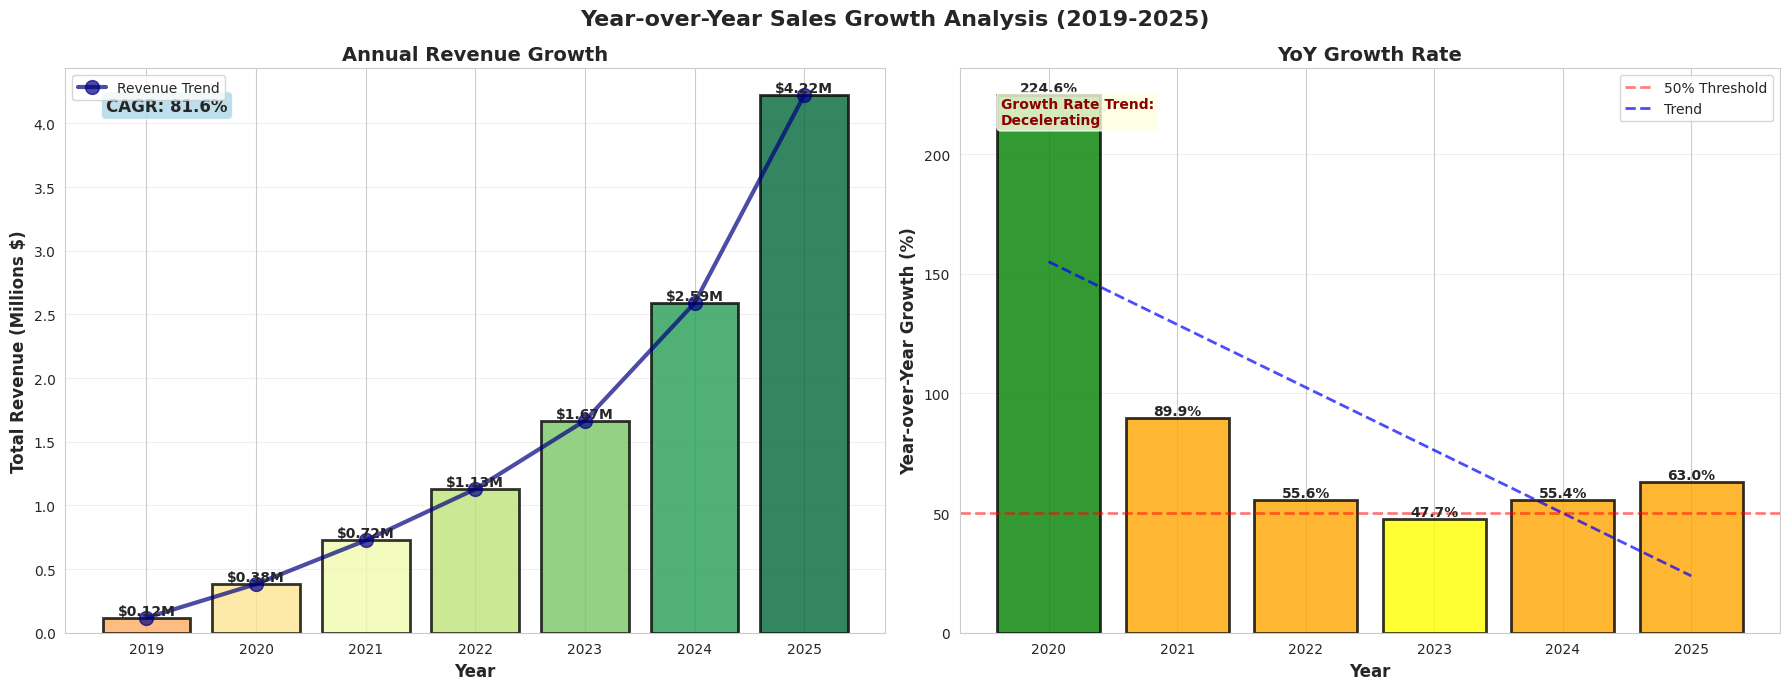


YEAR-OVER-YEAR SALES GROWTH SUMMARY
Analysis Period: 2019 - 2025
Total Years: 7

Revenue Growth Overview:
  2019 Revenue: $117,556.35
  2025 Revenue: $4,221,522.75
  Total Growth: $4,103,966.40
  Growth Multiple: 35.91x
  CAGR (6 years): 81.64%

DETAILED YEAR-BY-YEAR BREAKDOWN
Year   Revenue            Prev Year          Growth $           Growth %  
--------------------------------------------------------------------------------
2019   $     117,556.35                N/A                N/A        N/A
2020   $     381,597.15 $     117,556.35 $     264,040.80    224.6%
2021   $     724,752.49 $     381,597.15 $     343,155.34     89.9%
2022   $   1,127,910.47 $     724,752.49 $     403,157.98     55.6%
2023   $   1,665,713.57 $   1,127,910.47 $     537,803.10     47.7%
2024   $   2,589,102.87 $   1,665,713.57 $     923,389.30     55.4%
2025   $   4,221,522.75 $   2,589,102.87 $   1,632,419.88     63.0%

GROWTH RATE ANALYSIS
Average YoY Growth: 89.39%
Median YoY Growth: 59.34%
Highest G

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('05_yoy_sales.csv')

# Sort by year
df = df.sort_values('year')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Year-over-Year Sales Growth Analysis (2019-2025)', fontsize=16, fontweight='bold')

# Plot 1: Revenue Growth with Trend Line
ax1 = axes[0]

# Bar chart for revenue
colors = plt.cm.RdYlGn(np.linspace(0.3, 1, len(df)))
bars = ax1.bar(df['year'], df['total_revenue'] / 1e6,
               color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Add line chart overlay
ax1.plot(df['year'], df['total_revenue'] / 1e6,
         marker='o', linewidth=3, markersize=10, color='navy',
         alpha=0.7, label='Revenue Trend')

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Revenue (Millions $)', fontsize=12, fontweight='bold')
ax1.set_title('Annual Revenue Growth', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend(loc='upper left', fontsize=10)

# Add value labels on bars
for i, (year, revenue) in enumerate(zip(df['year'], df['total_revenue'])):
    ax1.text(year, revenue / 1e6, f'${revenue/1e6:.2f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add CAGR annotation
first_year_rev = df.iloc[0]['total_revenue']
last_year_rev = df.iloc[-1]['total_revenue']
years = len(df) - 1
cagr = (((last_year_rev / first_year_rev) ** (1/years)) - 1) * 100

ax1.text(0.05, 0.95, f'CAGR: {cagr:.1f}%',
         transform=ax1.transAxes, fontsize=12, fontweight='bold',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Plot 2: YoY Growth Rate
ax2 = axes[1]

# Filter out NaN growth values
df_growth = df[df['yoy_growth'].notna()]

# Create bar chart with color coding
colors_growth = ['green' if x > 100 else 'orange' if x > 50 else 'yellow'
                 for x in df_growth['yoy_growth']]
bars2 = ax2.bar(df_growth['year'], df_growth['yoy_growth'],
                color=colors_growth, alpha=0.8, edgecolor='black', linewidth=2)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Year-over-Year Growth (%)', fontsize=12, fontweight='bold')
ax2.set_title('YoY Growth Rate', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50% Threshold')
ax2.legend(loc='upper right', fontsize=10)

# Add value labels
for i, (year, growth) in enumerate(zip(df_growth['year'], df_growth['yoy_growth'])):
    ax2.text(year, growth, f'{growth:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add growth trend line
z = np.polyfit(df_growth['year'], df_growth['yoy_growth'], 1)
p = np.poly1d(z)
ax2.plot(df_growth['year'], p(df_growth['year']),
         "b--", linewidth=2, alpha=0.7, label='Trend')
ax2.legend(loc='upper right', fontsize=10)

# Add annotation for declining growth rate
ax2.text(0.05, 0.95, 'Growth Rate Trend:\nDecelerating',
         transform=ax2.transAxes, fontsize=10, fontweight='bold',
         verticalalignment='top', color='darkred',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("YEAR-OVER-YEAR SALES GROWTH SUMMARY")
print("="*80)
print(f"Analysis Period: {df['year'].min():.0f} - {df['year'].max():.0f}")
print(f"Total Years: {len(df)}")

print(f"\nRevenue Growth Overview:")
print(f"  2019 Revenue: ${df.iloc[0]['total_revenue']:,.2f}")
print(f"  2025 Revenue: ${df.iloc[-1]['total_revenue']:,.2f}")
print(f"  Total Growth: ${df.iloc[-1]['total_revenue'] - df.iloc[0]['total_revenue']:,.2f}")
print(f"  Growth Multiple: {df.iloc[-1]['total_revenue'] / df.iloc[0]['total_revenue']:.2f}x")
print(f"  CAGR (6 years): {cagr:.2f}%")

print("\n" + "="*80)
print("DETAILED YEAR-BY-YEAR BREAKDOWN")
print("="*80)
print(f"{'Year':<6} {'Revenue':<18} {'Prev Year':<18} {'Growth $':<18} {'Growth %':<10}")
print("-"*80)
for _, row in df.iterrows():
    year = int(row['year'])
    revenue = row['total_revenue']
    prev_rev = row['prev_year_revenue'] if pd.notna(row['prev_year_revenue']) else 0
    growth_amt = revenue - prev_rev if pd.notna(row['prev_year_revenue']) else 0
    growth_pct = row['yoy_growth'] if pd.notna(row['yoy_growth']) else 0

    if pd.notna(row['yoy_growth']):
        print(f"{year:<6} ${revenue:>15,.2f} ${prev_rev:>15,.2f} "
              f"${growth_amt:>15,.2f} {growth_pct:>8.1f}%")
    else:
        print(f"{year:<6} ${revenue:>15,.2f} {'N/A':>18} {'N/A':>18} {'N/A':>10}")

print("\n" + "="*80)
print("GROWTH RATE ANALYSIS")
print("="*80)
df_growth = df[df['yoy_growth'].notna()]
print(f"Average YoY Growth: {df_growth['yoy_growth'].mean():.2f}%")
print(f"Median YoY Growth: {df_growth['yoy_growth'].median():.2f}%")
print(f"Highest Growth Year: {df_growth.loc[df_growth['yoy_growth'].idxmax(), 'year']:.0f} ({df_growth['yoy_growth'].max():.2f}%)")
print(f"Lowest Growth Year: {df_growth.loc[df_growth['yoy_growth'].idxmin(), 'year']:.0f} ({df_growth['yoy_growth'].min():.2f}%)")

print("\n" + "="*80)
print("GROWTH STAGES")
print("="*80)
for _, row in df_growth.iterrows():
    year = int(row['year'])
    growth = row['yoy_growth']

    if growth >= 150:
        stage = "Explosive Growth (>150%)"
    elif growth >= 75:
        stage = "Rapid Growth (75-150%)"
    elif growth >= 50:
        stage = "Strong Growth (50-75%)"
    else:
        stage = "Moderate Growth (<50%)"

    print(f"{year}: {growth:>6.1f}% - {stage}")

print("\n" + "="*80)
print("REVENUE MILESTONES")
print("="*80)
milestones = [
    (100000, "First $100K"),
    (500000, "Half Million"),
    (1000000, "First Million"),
    (2000000, "Second Million"),
    (4000000, "Fourth Million")
]

for milestone, label in milestones:
    milestone_year = df[df['total_revenue'] >= milestone]['year'].min()
    if pd.notna(milestone_year):
        milestone_rev = df[df['year'] == milestone_year]['total_revenue'].values[0]
        print(f"{label:20s}: {milestone_year:.0f} (${milestone_rev:,.2f})")
    else:
        print(f"{label:20s}: Not yet reached")

print("="*80)